In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("datas/Healthcare-Diabetes.csv")

In [3]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df=df.drop(columns=["Id"])

In [7]:
df.duplicated().sum()

np.int64(1990)

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64

#### Data Visualization

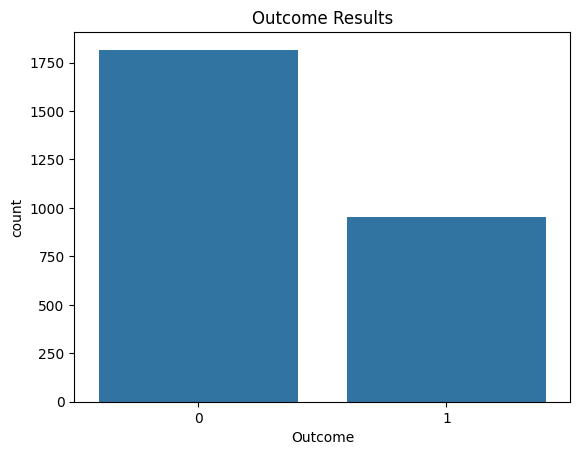

In [9]:
sns.countplot(x=df['Outcome'])
plt.title('Outcome Results');

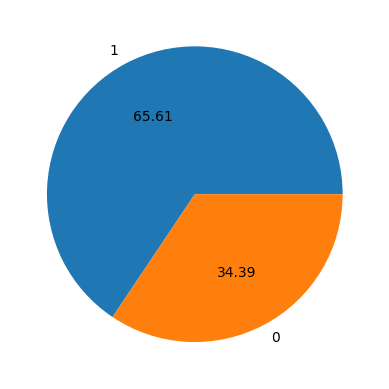

In [10]:
plt.pie(df.groupby(by=["Outcome"]).size(), labels = df["Outcome"].unique(), autopct = "%0.2f")
plt.show()

##### the correlation matrix

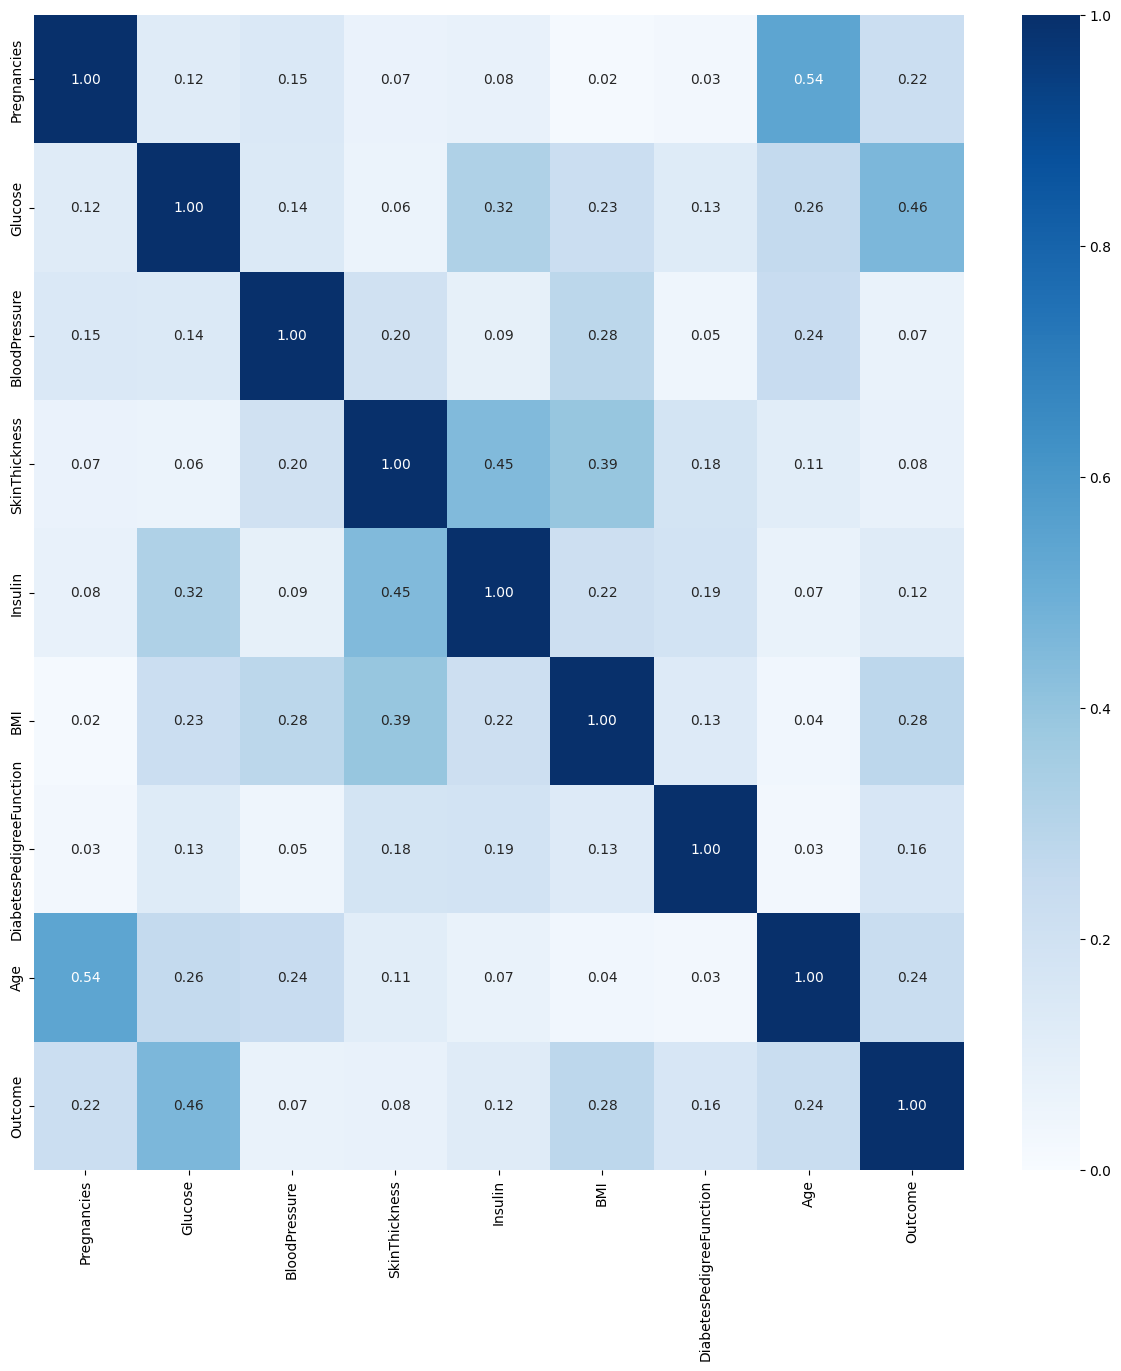

In [11]:
corr=abs(df.corr())
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.show()

##### Calculate the correlation with the target column

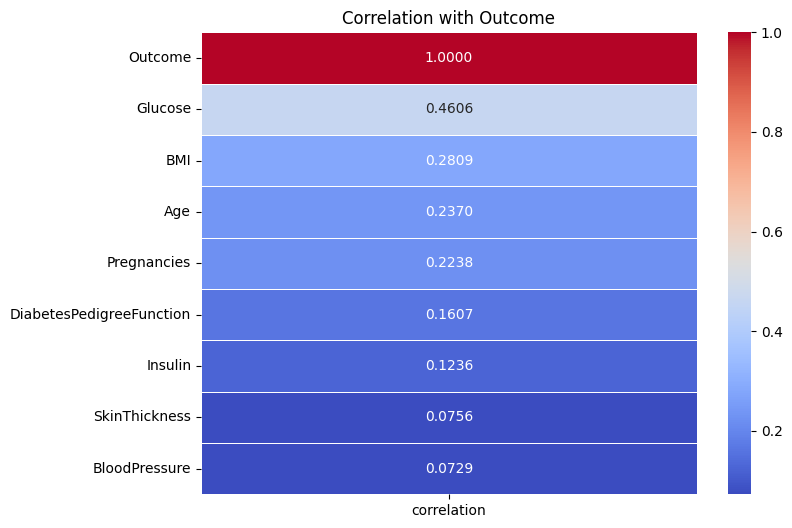

In [12]:
corr = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

#### Split dataframe into X and y

In [13]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=17)

#### MLFLOW

In [15]:
#!pip install google-cloud-storage
#!pip install google-cloud

In [16]:
import mlflow
from google.cloud import storage
import os
from dotenv import load_dotenv

load_dotenv()

storage_access_key = os.getenv("STORAGE_ACCESS_KEY")  
bucket_name = os.getenv("GCP_BUCKET_NAME")
mlflow_tracking = os.getenv("GCP_MLFLOW_TRACKING")
artifact_location = os.getenv("GC_ARTIFACT_LOCALISATION")
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = storage_access_key

storage_client = storage.Client.from_service_account_json(storage_access_key)

MLFLOW_TRACKING_URI = mlflow_tracking
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
experiment_name = "diabetes_prediction"

if mlflow.get_experiment_by_name(experiment_name) is None:
    experiment_id = mlflow.create_experiment(
        experiment_name,
        artifact_location=artifact_location
    )
else:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

print(f"Expérience configurée avec l'ID : {experiment_id}")


Expérience configurée avec l'ID : 1


DecisionTree

In [17]:
#DT_model = DecisionTreeClassifier(random_state=20)
#DT_model.fit(X_train , y_train)
#DT_model.score(X_test , y_test)

with mlflow.start_run(experiment_id=experiment_id):
    mlflow.set_tag("Dev","Bérenger")
    mlflow.set_tag("model","DecisionTree")
    mlflow.set_tag("mlflow.runName", "DecisionTree")
    
    # hyperparamètres
    random_state = 20
    mlflow.log_param("random_state", random_state)
    
    DT_model = DecisionTreeClassifier(random_state=random_state)
    DT_model.fit(X_train, y_train)
    
    accuracy = DT_model.score(X_test, y_test)
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.sklearn.log_model(DT_model, "decision_tree_model")
    
    print(f"Modèle enregistré avec une précision de {accuracy:.4f}")

2024/12/02 18:41:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modèle enregistré avec une précision de 0.9916


In [18]:
DT_pred=DT_model.predict(X_test)
DT_acc = accuracy_score(y_test ,DT_pred )
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      1.00      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



SVM

In [19]:
from sklearn import svm
#svc = svm.SVC(kernel='rbf')
#svc.fit(X_train, y_train)
#svc.score(X_train , y_train)

with mlflow.start_run(experiment_id=experiment_id):
    kernel = 'rbf'
    mlflow.set_tag("model","SVM_Model")
    mlflow.set_tag("mlflow.runName", "SVM_Model")
    mlflow.log_param("model_type", "SVC")
    mlflow.log_param("kernel", kernel)

    svc = svm.SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    
    accuracy = svc.score(X_train, y_train)
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.sklearn.log_model(svc, "svm_model")
    print(f"SVM accuracy: {accuracy:.4f}")

2024/12/02 18:41:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM accuracy: 0.7749


In [20]:
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       539
           1       0.72      0.51      0.60       292

    accuracy                           0.76       831
   macro avg       0.75      0.70      0.71       831
weighted avg       0.75      0.76      0.75       831



Random forest

In [21]:
#RF_model = RandomForestClassifier(n_estimators=100)
#RF_model.fit(X_train , y_train)
#RF_model.score(X_train , y_train)

with mlflow.start_run(experiment_id=experiment_id):
    mlflow.set_tag("model","RandomForestModel")
    mlflow.set_tag("mlflow.runName", "RandomForestModel")
    
    n_estimators = 100
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("n_estimators", n_estimators)

    RF_model = RandomForestClassifier(n_estimators=n_estimators)
    RF_model.fit(X_train, y_train)
    
    accuracy = RF_model.score(X_train, y_train)
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.sklearn.log_model(RF_model, "random_forest_model")
    print(f"Random Forest accuracy: {accuracy:.4f}")

2024/12/02 18:42:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest accuracy: 1.0000


In [22]:
RF_pred = RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      0.99      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Models scores

In [23]:
models=pd.DataFrame({
    'models':['Decsion_Tree','SVC','Random_forest'],
    'scores':[DT_acc,svc_acc,RF_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
1,SVC,0.759326
2,Random_forest,0.990373
0,Decsion_Tree,0.991576
